In [ ]:
from base64 import b64encode

import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML

In [ ]:
def imshow(title="", image=None, size=12):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

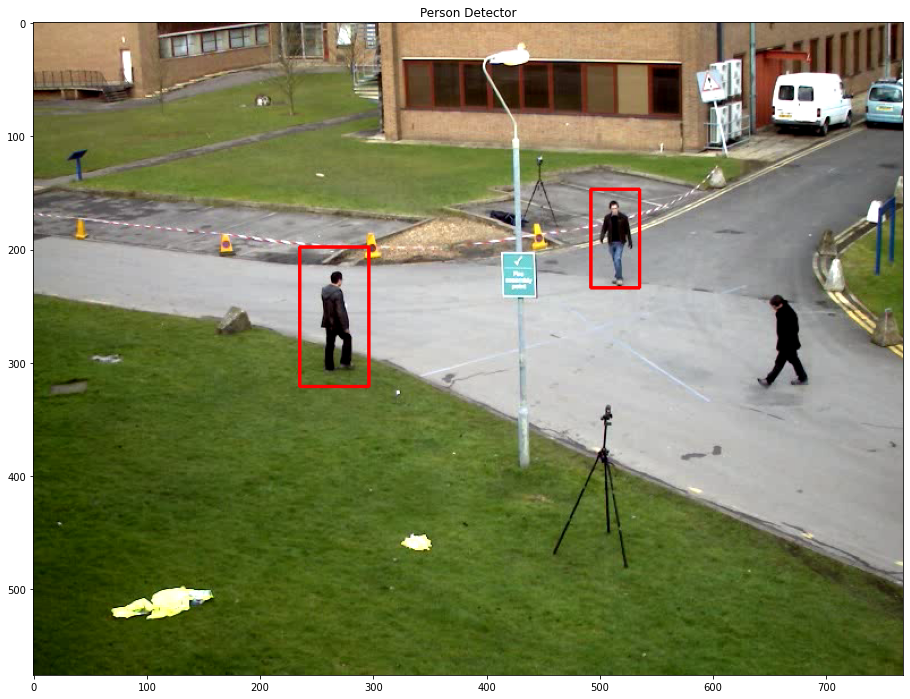

In [ ]:
haar_person_detector = cv2.CascadeClassifier('haarcascade_fullbody.xml')

cap = cv2.VideoCapture('walking.avi')

ret, frame = cap.read()
if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = haar_person_detector.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

cap.release()

imshow("Person Detector", frame)

In [ ]:
cap = cv2.VideoCapture('walking.avi')

w = int(cap.get(3))
h = int(cap.get(4))

output = cv2.VideoWriter('walking_output.avi',
                         cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'),
                         fps=30,
                         frameSize=(w, h))

ret, frame = cap.read()
while(ret):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = haar_person_detector.detectMultiScale(gray, 1.1, 5)

    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    output.write(frame)
    ret, frame = cap.read()

cap.release()
output.release()

In [ ]:
!ffmpeg -i walking_output.avi walking_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
mp4 = open('walking_output.mp4', 'rb').read()
data_src = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
    <video controls>
        <source src="%s" type="video/mp4">
    </video>
""" % data_src)

In [ ]:
haar_car_detector = cv2.CascadeClassifier('haarcascade_car.xml')

cap = cv2.VideoCapture('cars.avi')

w = int(cap.get(3))
h = int(cap.get(4))

output = cv2.VideoWriter('cars_output.avi',
                         cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'),
                         fps=30,
                         frameSize=(w, h))

ret, frame = cap.read()
while(ret):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cars = haar_car_detector.detectMultiScale(gray, 1.03, 5)

    for (x, y, w, h) in cars:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    output.write(frame)
    ret, frame = cap.read()

cap.release()
output.release()

In [ ]:
!ffmpeg -i cars_output.avi cars_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
mp4 = open('cars_output.mp4', 'rb').read()
data_src = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
    <video controls>
        <source src="%s" type="video/mp4">
    </video>
""" % data_src)